In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import grok

In [3]:
oper_reverse_dict = {v: k for k, v in grok.data.VALID_OPERATORS.items()}
operators = oper_reverse_dict.keys()

In [4]:
operators

dict_keys(['addition', 'subtraction', 'muliplication', 'division', 'squarepoly', 'cubepoly', 'quad1', 'quad2', 'quad3', 'cube1', 'cube2', 'mix1', 's5', 's5conj', 's5aba', 'even-addition_odd-multiplication', 'even-addition_odd-subtraction', 'sort', 'reverse', 'copy'])

In [5]:
def get_operator_symbols(path):
    for op_name in operators:
        if op_name in path:
            return oper_reverse_dict[op_name]

In [6]:
import glob
import os
import math

In [8]:
glob.glob('./expt-231030/expt-test-4-duplication-0p5/*')

['./expt-231030/expt-test-4-duplication-0p5/run-subtraction-batchfrac-0.2-trpct-50',
 './expt-231030/expt-test-4-duplication-0p5/run-division-batchfrac-0.2-trpct-50',
 './expt-231030/expt-test-4-duplication-0p5/hparams.yaml',
 './expt-231030/expt-test-4-duplication-0p5/run-addition-batchfrac-0.2-trpct-50',
 './expt-231030/expt-test-4-duplication-0p5/run-squarepoly-batchfrac-0.2-trpct-50',
 './expt-231030/expt-test-4-duplication-0p5/run-muliplication-batchfrac-0.2-trpct-50']

In [9]:
def plot_val_acc(csvpath, ax=None, scale='arithmetic', title='Validation Accuracy over Epochs'):
    try:
        df = pd.read_csv(csvpath)
        is_single_plot = ax == None
        _fig = plt.figure(figsize=(10, 6)) if is_single_plot else ax
        
        # Plotting val_accuracy
        _fig.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-')
        _fig.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-')
    
        if is_single_plot:
            _fig.title(title)
            _fig.xlabel('Epoch')
            _fig.ylabel('Validation Accuracy')
        else:
            _fig.set_title(title)
            _fig.set_xlabel('Epoch')
            _fig.set_ylabel('Validation Accuracy')
            
        if scale == 'arithmetic':
            _fig.grid(True)
        elif scale == 'log':
            if is_single_plot:
                _fig.xscale('log')
            else:
                _fig.set_xscale('log')
            _fig.grid(True, which="both", ls="--", c='0.7')  # this will ensure that the grid appears correctly on log scale

    except:
        print(f'{csvpath} doesn\'t exists')


def get_plot_batches(exptpath, plot_num=9):
    log_subdir_path = 'lightning_logs/version_0/metrics.csv'
    total = glob.glob(f'{exptpath}/*')
    batches = {}
    for i, expt_path in enumerate(total):
        key = i // plot_num
        if key not in batches.keys():
            batches[key] = []
        batches[key].append(os.path.join(expt_path, log_subdir_path))
    return batches

def draw_figure(fig_title, csvpaths, plot_num=9, save_fig=False):
    axis_len = math.isqrt(plot_num)
    assert axis_len * axis_len == plot_num

    # Create a figure with 3x3 subplots
    fig, axs = plt.subplots(axis_len, axis_len, figsize=(12, 8))
    fig.suptitle(f'{fig_title}')
    for i, csvpath in enumerate(csvpaths):
        title = get_operator_symbols(csvpath)
        plot_val_acc(csvpath, ax=axs[i//axis_len, i % axis_len], scale='log', title=title)
    
    # Adjust the layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()
    if save_fig:
        fig.savefig(f'{fig_title}.png', bbox_inches='tight')

In [12]:
batches = get_plot_batches('./expt-231030/expt-test-4-duplication-0p5', 9)

./expt-231030/expt-test-4-duplication-0p5/hparams.yaml/lightning_logs/version_0/metrics.csv doesn't exists


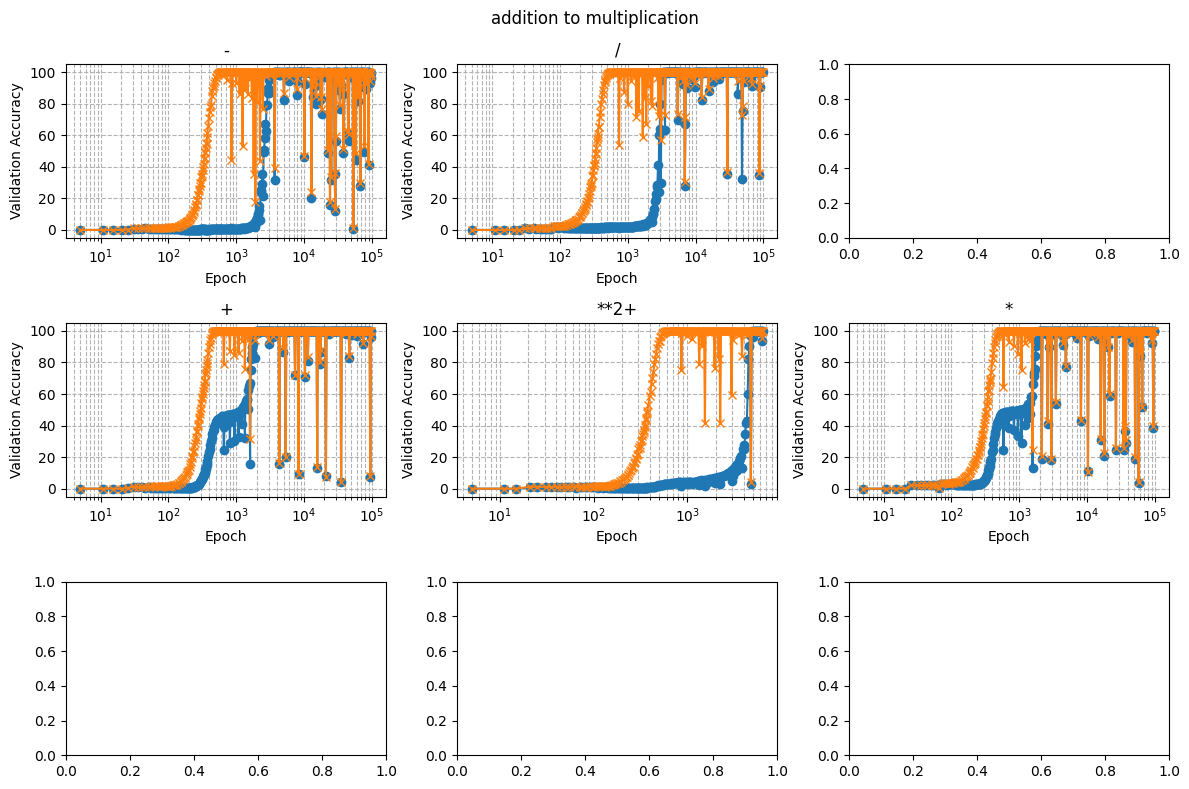

In [16]:
batches = get_plot_batches('./expt-231030/expt-test-4-duplication-0p5', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

./expt-231030/expt-2-batchsize-0p2-no-duplication/hparams.yaml/lightning_logs/version_0/metrics.csv doesn't exists


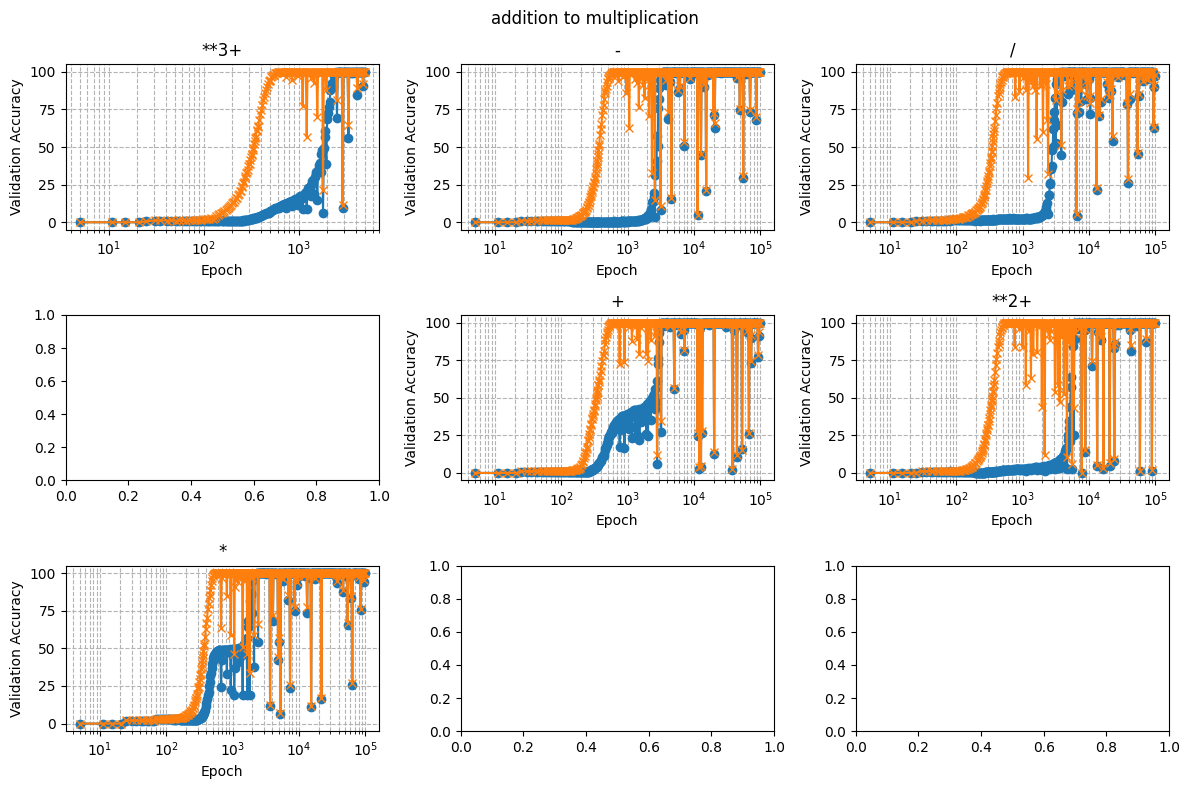

In [17]:
batches = get_plot_batches('./expt-231030/expt-2-batchsize-0p2-no-duplication', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

./expt-231030/expt-3-batchsize-0p5-duplication-0p5/hparams.yaml/lightning_logs/version_0/metrics.csv doesn't exists


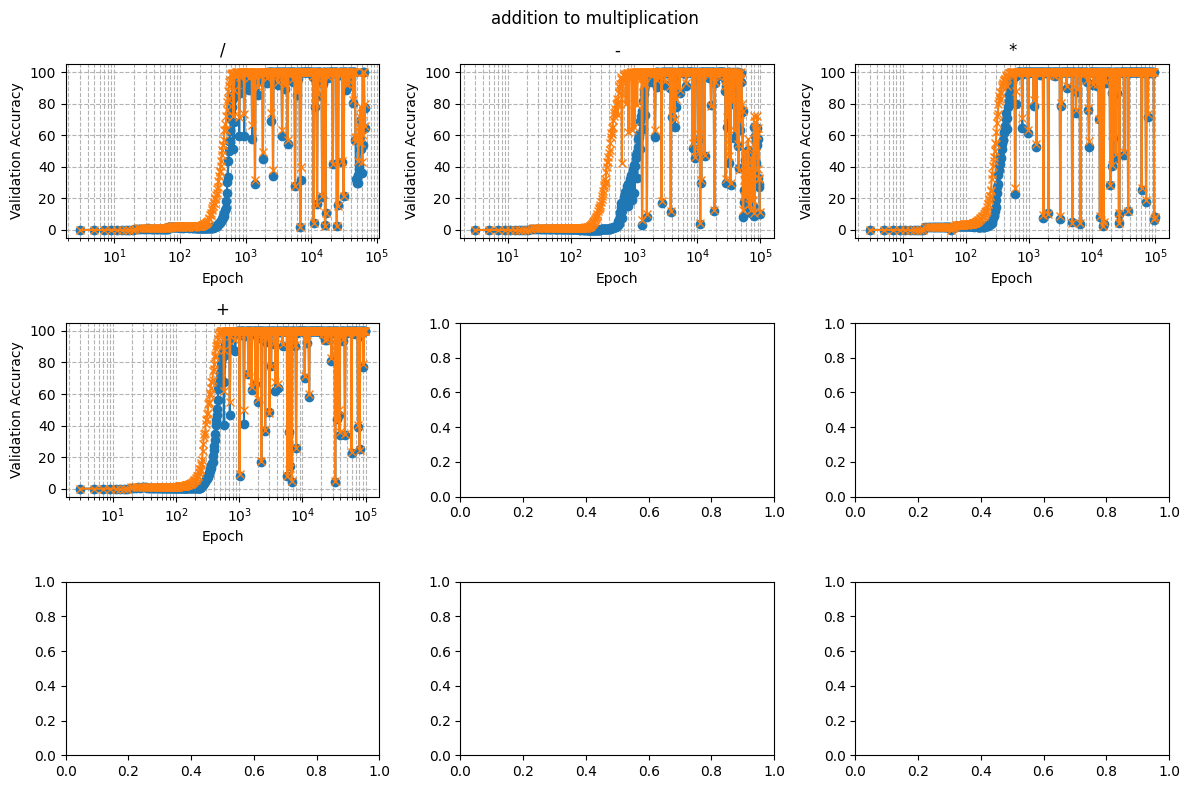

In [18]:
batches = get_plot_batches('./expt-231030/expt-3-batchsize-0p5-duplication-0p5', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

./expt-231030/expt-test-4-duplication-0p5/hparams.yaml/lightning_logs/version_0/metrics.csv doesn't exists


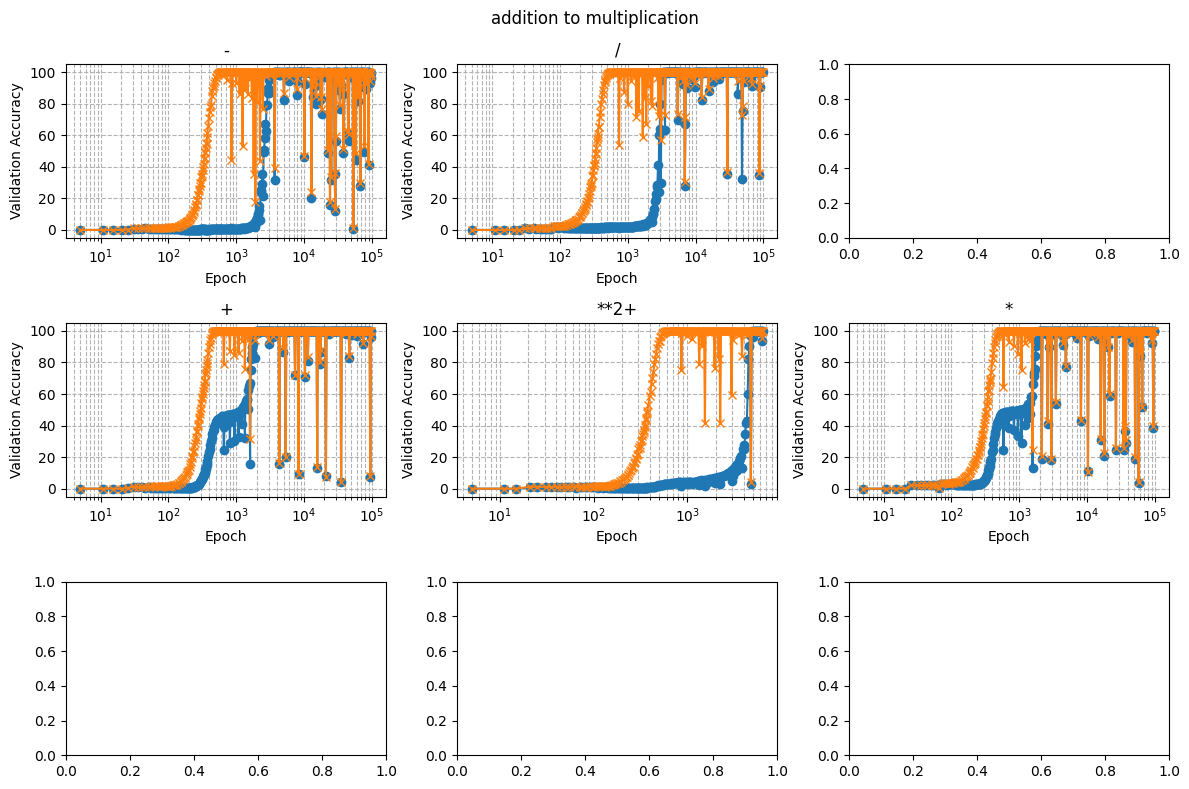

In [13]:
draw_figure('addition to multiplication', batches[0], save_fig=False)

In [15]:
draw_figure('quad1 to subtraction', batches[1], save_fig=False)

KeyError: 1

In [158]:
batches = get_plot_batches('../expt-3', 9)

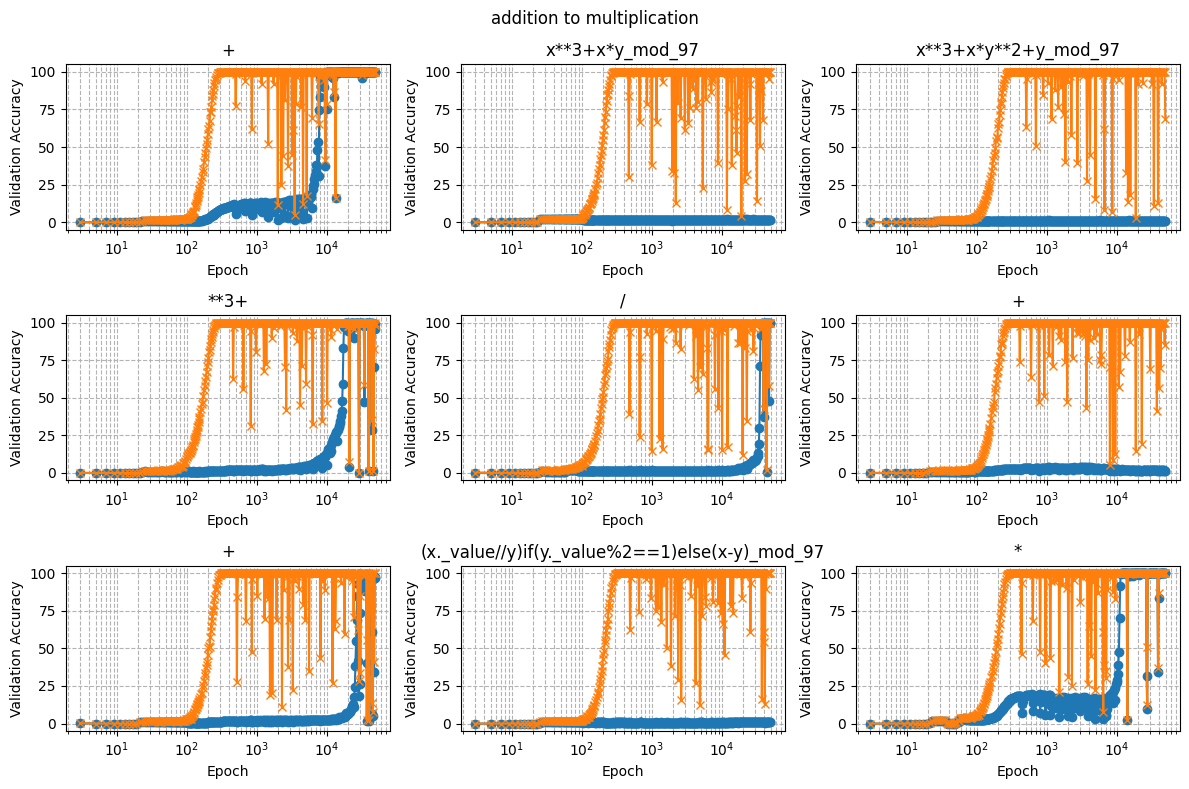

In [159]:
draw_figure('addition to multiplication', batches[0], save_fig=False)

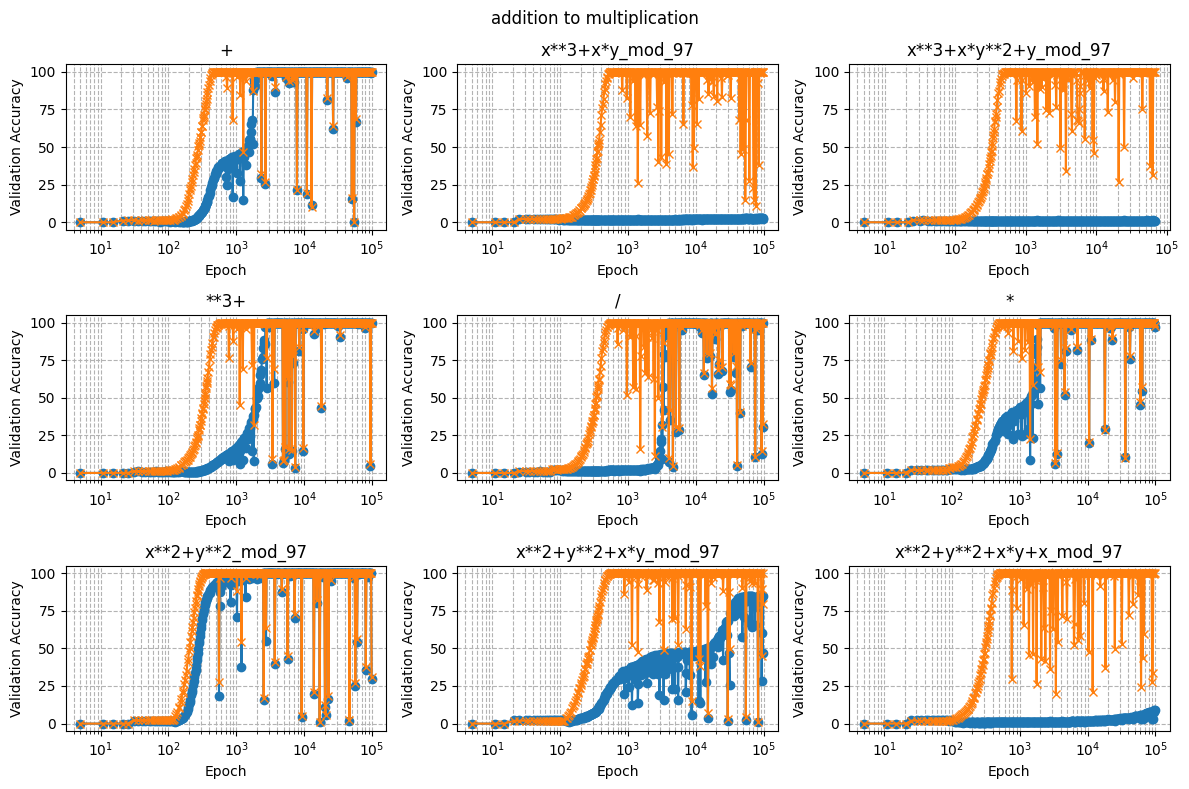

In [160]:
batches = get_plot_batches('../expt-4', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

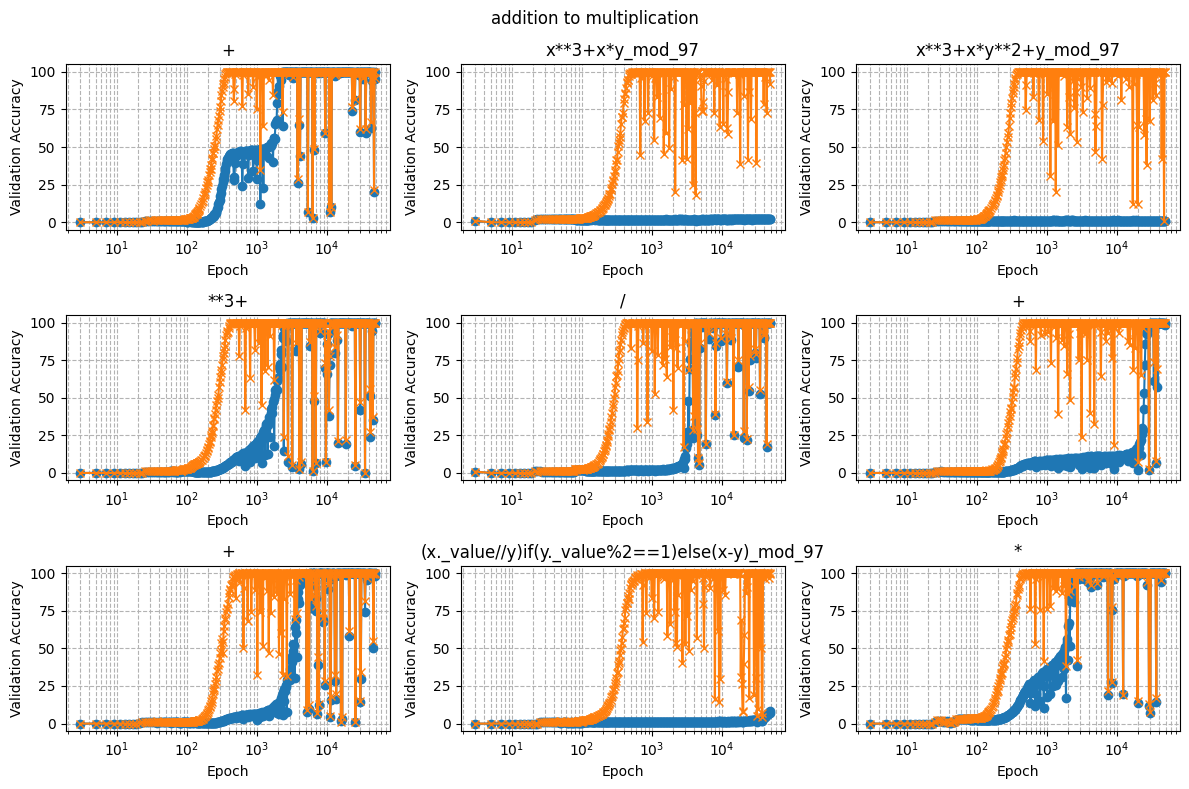

In [10]:
batches = get_plot_batches('../expt-2', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

../expt-5\hparams.yaml\lightning_logs/version_0/metrics.csv doesn't exists


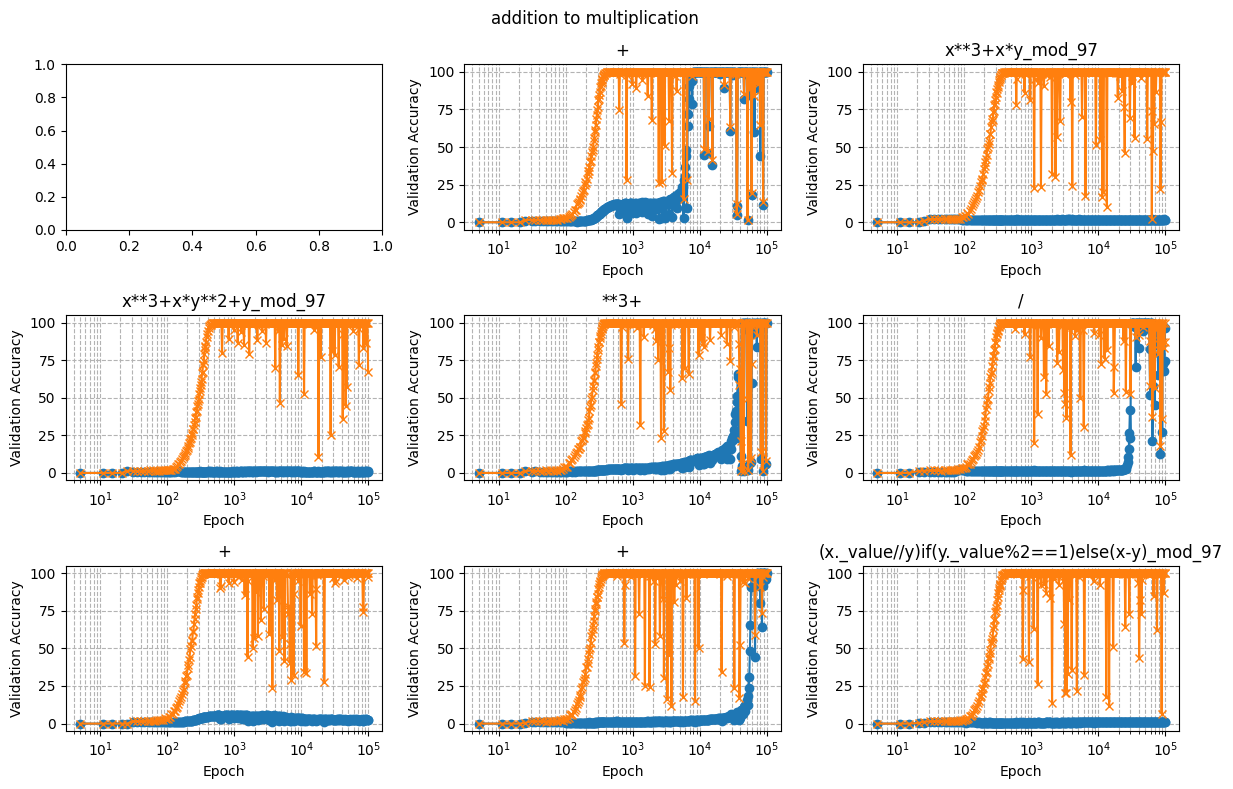

In [9]:
batches = get_plot_batches('../expt-5', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

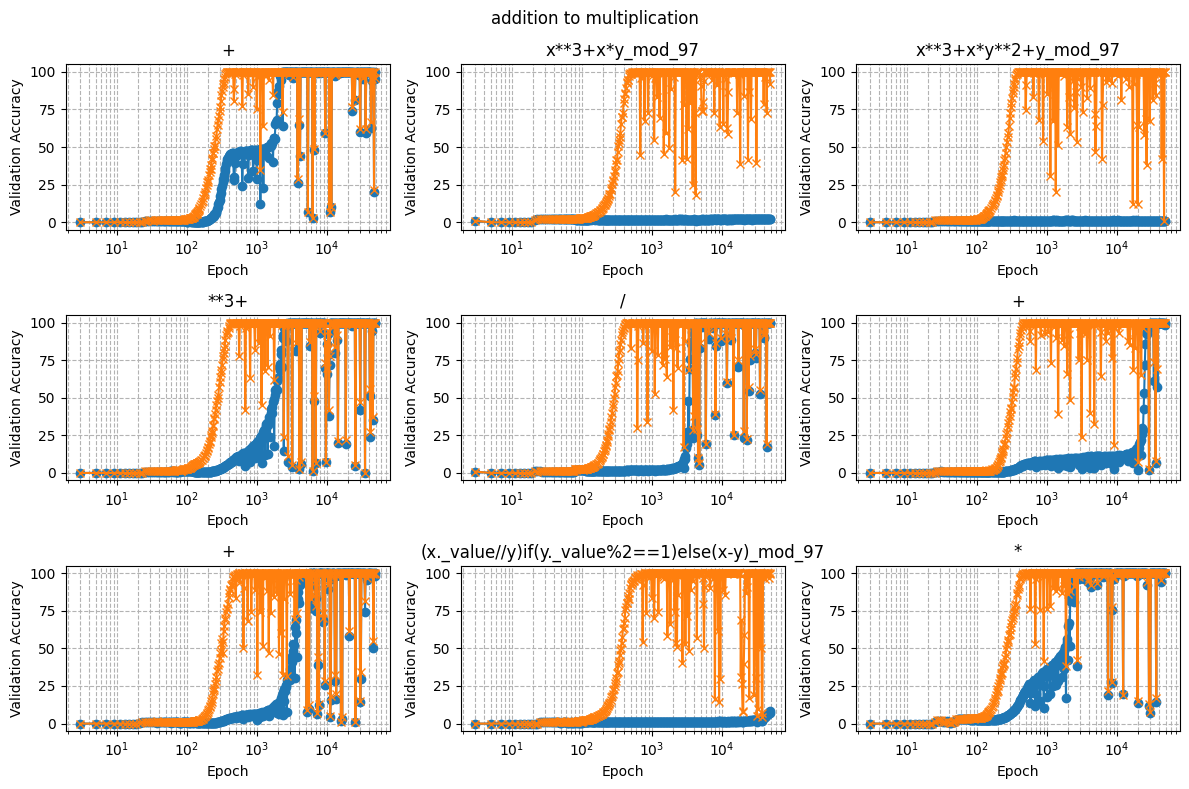

In [161]:
batches = get_plot_batches('../expt-2', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

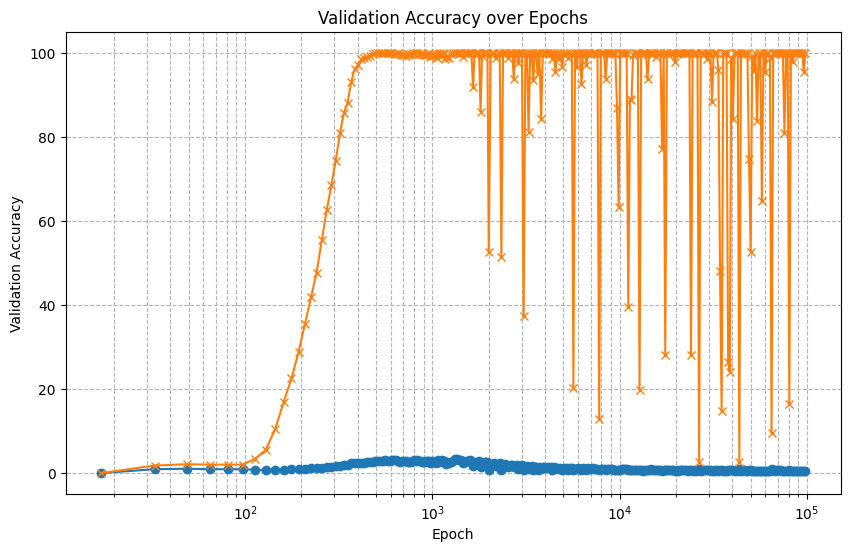

In [5]:
plot_val_acc("../run-addition-frac-p60-trpct10/lightning_logs/version_0/metrics.csv", 'log')

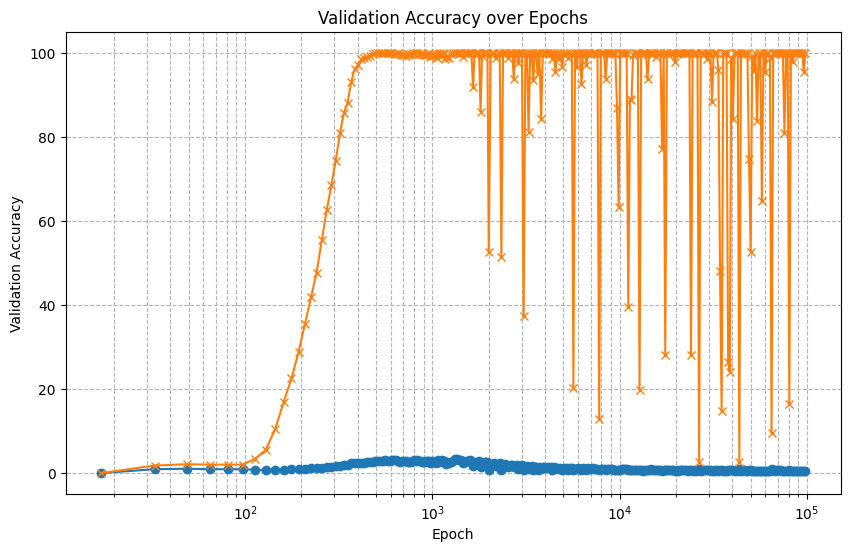

In [9]:
plot_val_acc("../run-addition-frac-p60-trpct10/lightning_logs/version_0/metrics.csv", 'log')

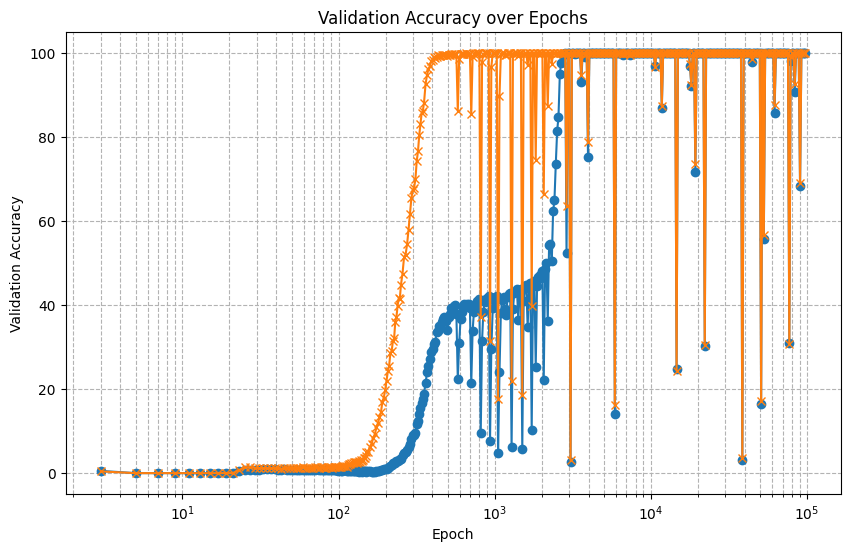

In [12]:
plot_val_acc("../run-addition-batchfrac-0p60-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

In [138]:
plot_val_acc("../run-s5-batchfrac-0p60-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

../run-s5-batchfrac-0p60-trpct-50/lightning_logs/version_0/metrics.csv doesn't exists


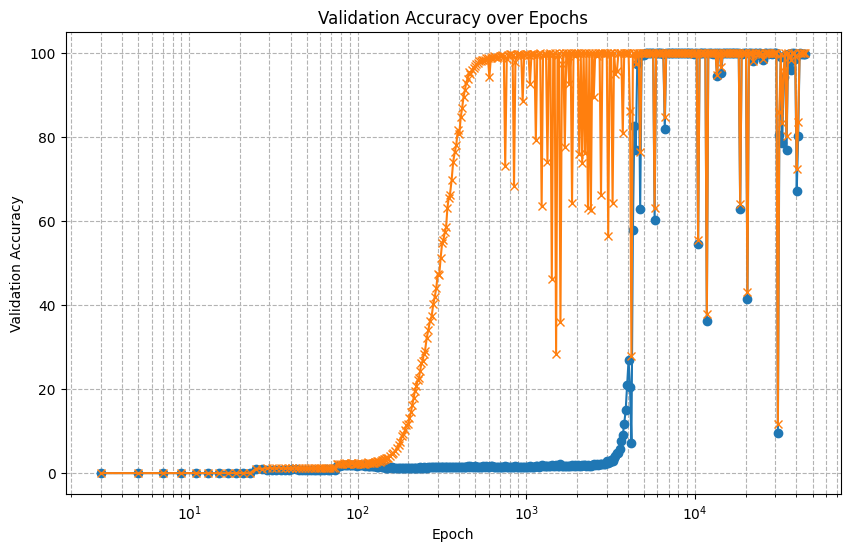

In [14]:
plot_val_acc("../run-division-batchfrac-0p60-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

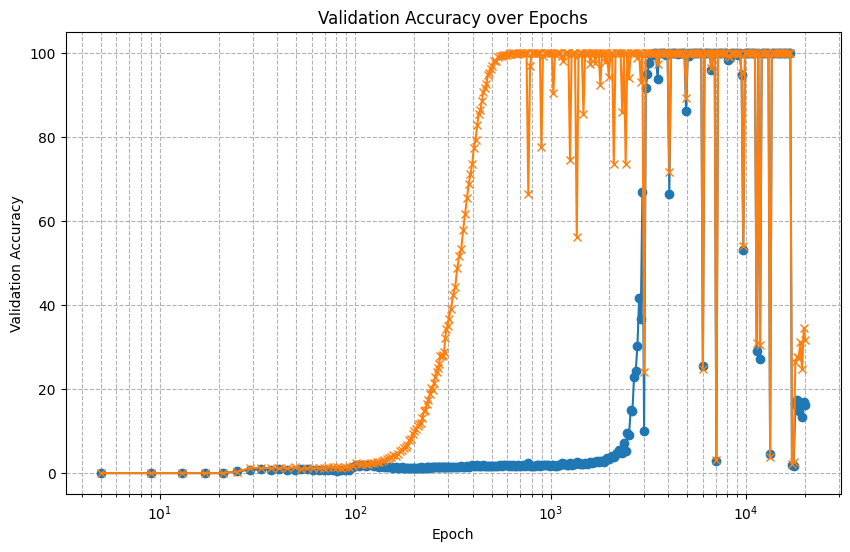

In [16]:
plot_val_acc("../run-division-batchfrac-0p30-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

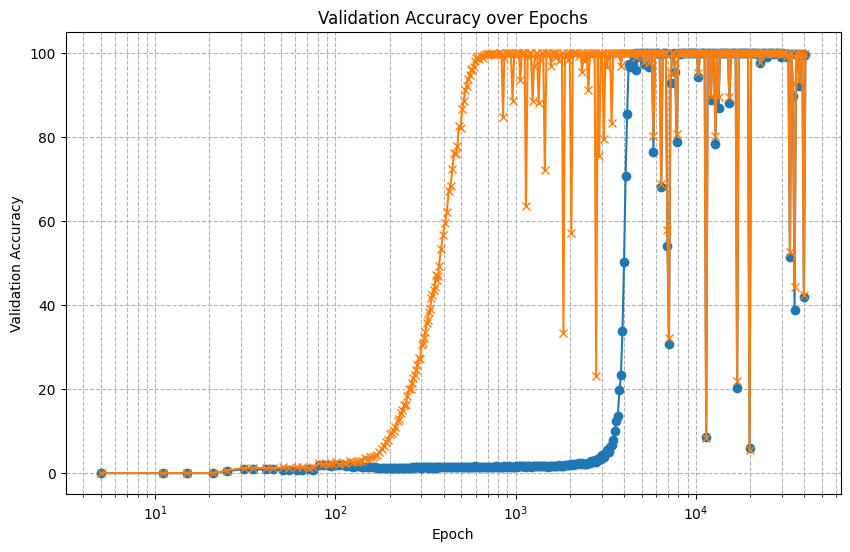

In [17]:
plot_val_acc("../run-division-batchfrac-0p20-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

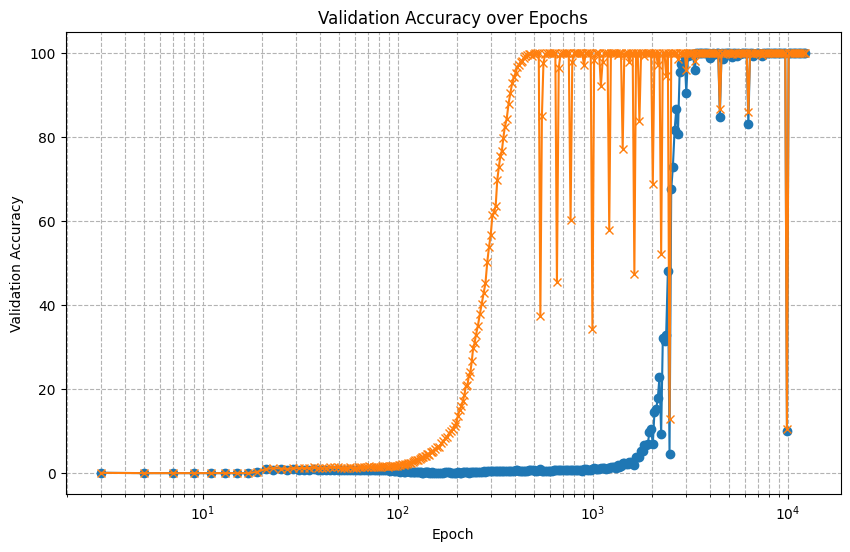

In [20]:
plot_val_acc("../expt-1/run---batchfrac-0.5-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

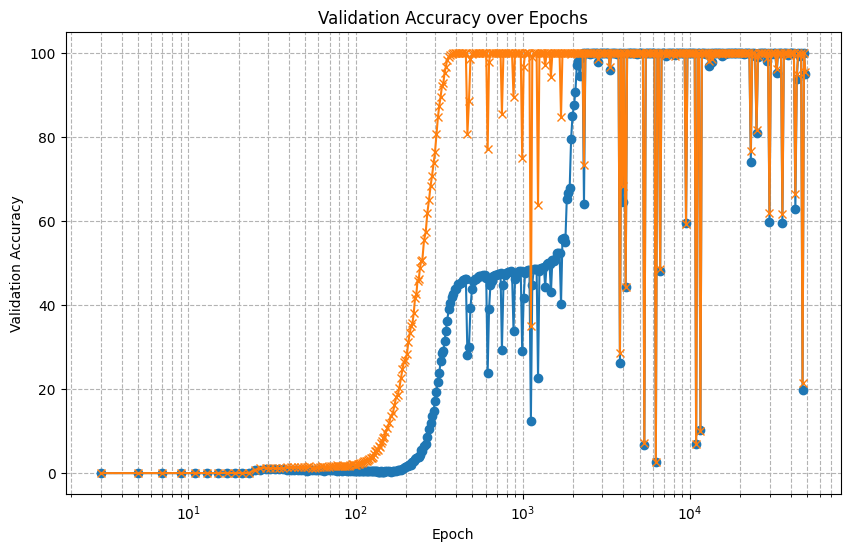

In [157]:
plot_val_acc("../expt-2/run-addition-batchfrac-0.5-trpct-50/lightning_logs/version_0/metrics.csv", scale='log', save_fig=True)

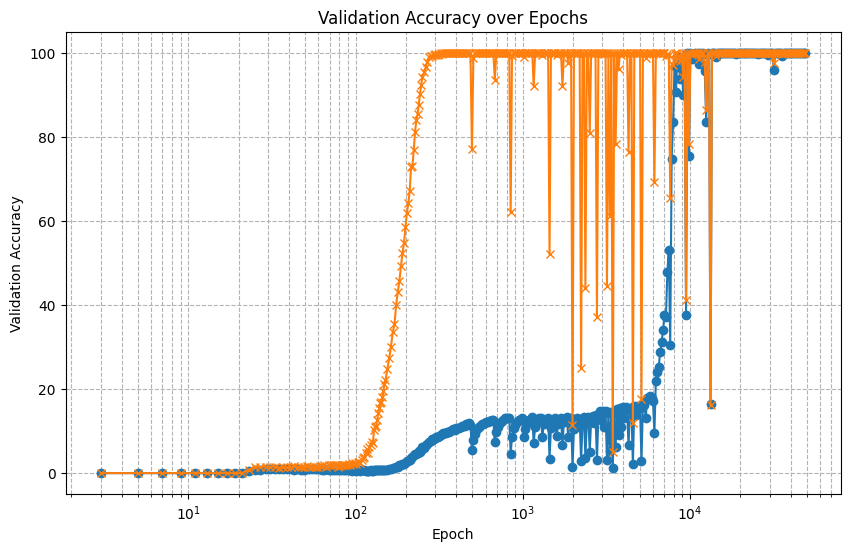

In [156]:
plot_val_acc("../expt-3/run-addition-batchfrac-0.5-trpct-25/lightning_logs/version_0/metrics.csv", scale='log', save_fig=True)

In [155]:
def plot_val_acc(csvpath, ax=None, scale='arithmetic', title='Validation Accuracy over Epochs', save_fig=False):
    df = pd.read_csv(csvpath)
    is_single_plot = ax == None
    _fig = None if is_single_plot else ax
    if is_single_plot:
        plt.figure(figsize=(10, 6))
    # Plotting val_accuracyZ
    if is_single_plot:
        plt.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-')
        plt.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-')
    else:
        _fig.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-')
        _fig.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-')

    if is_single_plot:
        plt.title(title)
        plt.xlabel('Epoch')
        plt.ylabel('Validation Accuracy')
    else:
        _fig.set_title(title)
        _fig.set_xlabel('Epoch')
        _fig.set_ylabel('Validation Accuracy')
        
    if scale == 'arithmetic':
        if is_single_plot:
            plt.grid(True)
        else:
            _fig.grid(True)
            
    elif scale == 'log':
        if is_single_plot:
            plt.xscale('log')
            plt.grid(True, which="both", ls="--", c='0.7')  # this will ensure that the grid appears correctly on log scale
        else:
            _fig.set_xscale('log')
            _fig.grid(True, which="both", ls="--", c='0.7')  # this will ensure that the grid appears correctly on log scale
    if save_fig:
        plt.savefig(f'{get_operator_symbols(csvpath)}.png', bbox_inches='tight')


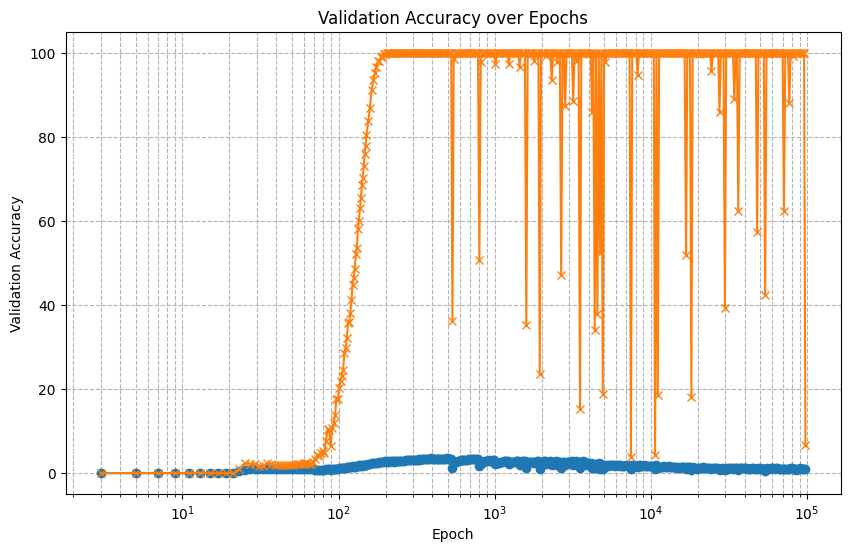

In [ ]:
plot_val_acc("../run-addition-frac-p50-trpct-10/lightning_logs/version_0/metrics.csv", 'log')

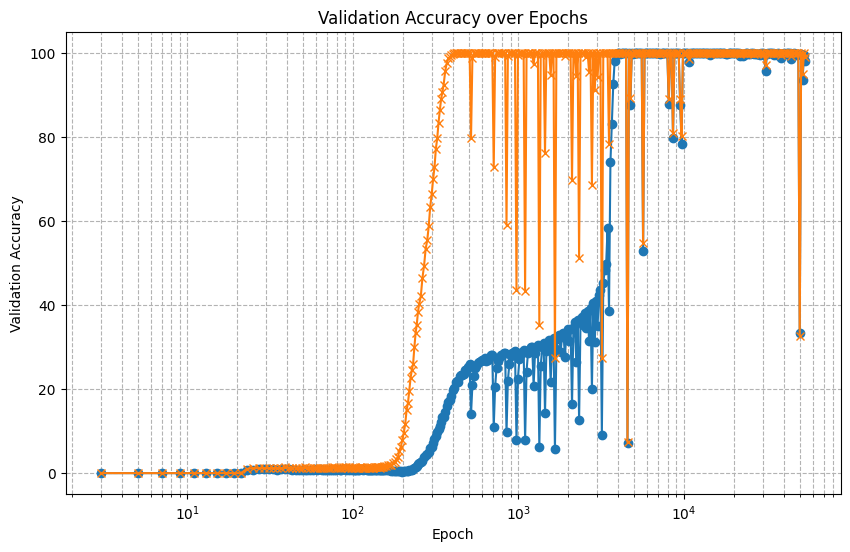

In [4]:
plot_val_acc("../run-addition-frac-0p50-trpct-40/lightning_logs/version_0/metrics.csv", 'log')